In [1]:
%load_ext nb_black

import performance_benchmark as pb
import glob, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import vinplots


def aggr_downsampled_paths(results_path):
    PathDict = {}
    for path in glob.glob(results_path):
        n_cells = int(path.split("_")[-1].split("cells")[0])
        PathDict[n_cells] = path

    return (
        (
            pd.DataFrame.from_dict(PathDict, orient="index")
            .sort_index()
            .rename({0: "path"}, axis=1)
        )
        .reset_index()
        .rename({"index": "n_cells"}, axis=1)
    )


def _pp(path):

    compare = pb.results.CompareMethods(path)

    SIMBA_MA = pb.results.SIMBAMemoryAugmentation(compare)
    plot_m = pb.results.process_results_for_plot(compare, tm_key="m")
    plot_m = SIMBA_MA.update(plot_m)
    plot_t = pb.results.process_results_for_plot(compare, tm_key="t")

    return {"m": plot_m.max(0), "t": plot_t.sum(0)}

GPUTrainingCoordinator: GPU INSTALLED
Available memory: 491 Gb
Available vCPUs: 24


<IPython.core.display.Javascript object>

In [2]:
results_path = "/home/mvinyard/SIMBA/simba_comparison/computational_complexity/mouse_neurons_downsample/results/mouse_neurons.downsample_*cells/"

path_df = aggr_downsampled_paths(results_path)

R = {}
for i in path_df.index:
    R[path_df["n_cells"][i]] = pd.DataFrame(_pp(path_df["path"][i]))
    
m_df = pd.concat(R.values(), axis=1).filter(regex="m")
m_df.columns = list(R.keys())

t_df = pd.concat(R.values(), axis=1).filter(regex="t")
t_df.columns = list(R.keys())

<IPython.core.display.Javascript object>

/tmp/ipykernel_4319/3291008976.py:10: RuntimeWarning: divide by zero encountered in log10
  yt = np.log10(t_df.loc[method].values)
/tmp/ipykernel_4319/3291008976.py:12: RuntimeWarning: divide by zero encountered in log10
  ym = np.log10(m_df.loc[method].values)


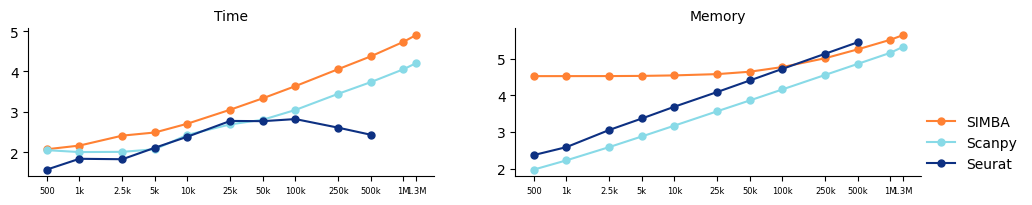

<IPython.core.display.Javascript object>

In [103]:
cc = ["#ff8133", "#88dae7", "#0d3082"]
labels = [
    "500",
    "1k",
    "2.5k",
    "5k",
    "10k",
    "25k",
    "50k",
    "100k",
    "250k",
    "500k",
    "1M",
    "1.3M",
]
fig, axes = vinplots.quick_plot(
    nplots=2, ncols=2, wspace=0.2, figsize_width=0.9, figsize_height=0.4
)
t_ax, m_ax = axes[0], axes[1]

color_labels = {"SIMBA": "#ff8133", "Scanpy": "#88dae7", "Seurat": "#0d3082"}
for method, c in color_labels.items():
    xt = np.log10(t_df.loc[method].index)
    yt = np.log10(t_df.loc[method].values)
    xm = np.log10(m_df.loc[method].index)
    ym = np.log10(m_df.loc[method].values)
    t_ax.plot(xt, yt, color=c, label=method, marker="o", ms=5)
    m_ax.plot(xm, ym, color=c, label=method, marker="o", ms=5)

t_ax.set_title("Time", fontsize=10)
t_ax.set_xticks(np.log10(t_df.columns), labels, fontsize=6)
m_ax.set_xticks(np.log10(m_df.columns), labels, fontsize=6)
m_ax.set_title("Memory", fontsize=10)
m_ax.legend(edgecolor="w", loc=(1, 0))
plt.savefig("mouse_neurons.downsample_time_mem_comparison.svg")